<a href="https://colab.research.google.com/github/Rh027/MachineLearningRMI/blob/main/MachineRMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
cj = np.loadtxt("/content/drive/MyDrive/cj121.txt",dtype=float,usecols=(0,1))
amp183 = np.loadtxt("/content/drive/MyDrive/9th-384-finit_change-amp.txt",dtype=float,usecols=(0,1))
amp02 = np.loadtxt("/content/drive/MyDrive/02amp9th256.txt",dtype=float,usecols=(0,1))
# Load the datasets
def load_data(file_paths):
    X = []
    y = []
    for file_path in file_paths:
        dataset = np.loadtxt(file_path)
        initial_amplitude = dataset[0, 1]  # Extract initial amplitude
        target_amplitudes = dataset[1:, 1]  # Remaining amplitudes
        X.append(initial_amplitude)
        y.append(target_amplitudes)

    X = np.array(X).reshape(-1, 1)  # Reshape X to be a 2D array with shape (n_samples, 1)

    # Find the maximum length of the sequences
    max_length = max(len(seq) for seq in y)

    # Pad sequences with zeros (or any other value you prefer)
    y_padded = np.array([np.pad(seq, (0, max_length - len(seq)), 'constant') for seq in y])

    return X, y_padded

# File paths
file_paths = [
    "/content/drive/MyDrive/cj121.txt",
    "/content/drive/MyDrive/9th-384-finit_change-amp.txt",
    "/content/drive/MyDrive/02amp9th256.txt"
]

# Load data
X, y = load_data(file_paths)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y.shape[1])  # Output layer predicts the sequence of amplitudes
])

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=500, batch_size=1, verbose=0)

# Evaluate the model (optional, since this is usually more relevant for classification)
loss = model.evaluate(X, y)
print(f"Loss: {loss:.4f}")

# Predict the sequence of amplitudes for a new initial amplitude
new_initial_amplitude = np.array([0.183]).reshape(-1, 1)  # Replace with your desired value
predicted_sequence = model.predict(new_initial_amplitude)

print(f"Predicted Sequence: {predicted_sequence}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.2538
Loss: 0.2538
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted Sequence: [[0.18545955 0.2232264  0.26084724 0.2894789  0.34232077 0.37999982
  0.42558345 0.46735233 0.5453752  0.5836856  0.61950475 0.7055914
  0.71451926 0.7738899  0.8005403  0.87542355 0.8508107  0.94969535
  1.009933   1.0221534  1.0694696  1.1550491  1.1379254  1.1514405
  1.2391645  1.2913979  1.2817111  1.3486894  1.3488424  1.4017721
  1.5193532  1.4470176  1.5486178  1.6851591  1.7091782  1.780963
  1.7162039  1.7056332  1.7622516  1.9591601  1.9978095  2.0399158
  2.1583254  2.1499667  2.1630218  2.1829236  2.0879714  2.0984237
  1.9073619  1.6935285  1.7111764  1.7711914  1.8521758  1.5352408
  1.5530252  1.5704368  1.5876527  1.6025378  1.6209749  1.6373662
  1.4933404  1.164406   0.94223267 0.8276676  0.77917194 0.7825991
  0.8782037  1.0744439  1.2451952  1.4076028 ]]


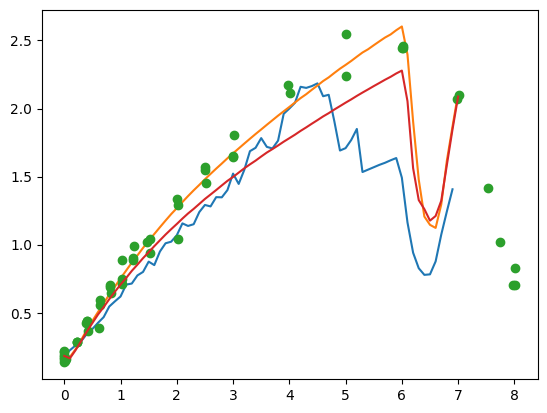

70


In [45]:
plt.plot(amp02[0:70,0],predicted_sequence[0])
plt.plot(amp02[:,0],amp02[:,1])
plt.plot(cj[:,0],cj[:,1],'o')
plt.plot(amp183[:,0],amp183[:,1])
plt.plot()
plt.show()
print(len(predicted_sequence[0]))